In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
import seaborn as sns

In [13]:
df = pd.read_csv('economic_index.csv')

In [14]:
df

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256
5,5,2017,7,2.50,5.6,1254
6,6,2017,6,2.50,5.5,1234
7,7,2017,5,2.25,5.5,1195
8,8,2017,4,2.25,5.5,1159
9,9,2017,3,2.25,5.6,1167


In [15]:
df.drop(columns=['Unnamed: 0', 'year', 'month'], inplace=True, axis="columns")

In [21]:
df.isnull().sum()

interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

In [22]:
## Visualization

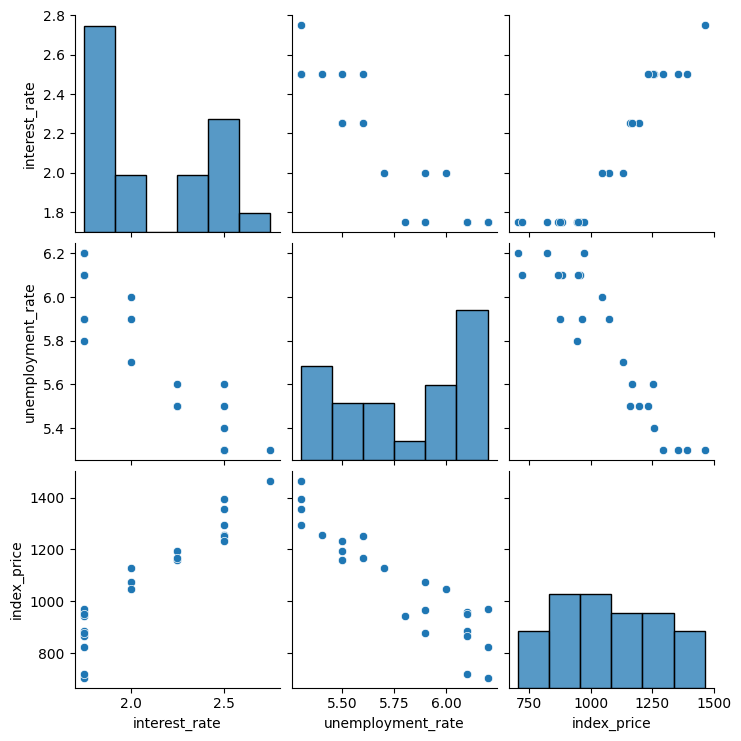

In [25]:
sns.pairplot(df)

In [26]:
df.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.925814,0.935793
unemployment_rate,-0.925814,1.000000,-0.922338
index_price,0.935793,-0.922338,1.000000


Text(0, 0.5, 'unemployment rate')

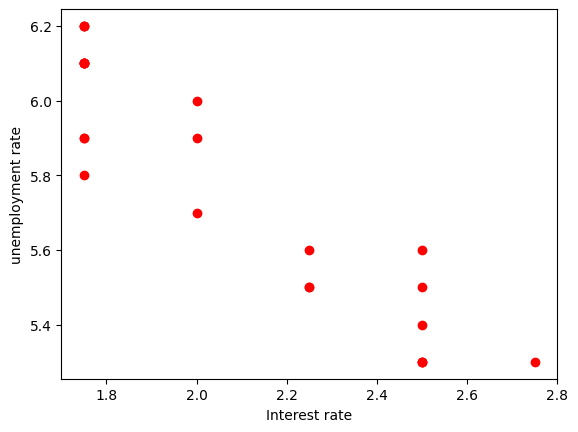

In [33]:
plt.scatter(df['interest_rate'], df['unemployment_rate'], c='r')
plt.xlabel('Interest rate')
plt.ylabel('unemployment rate')

In [43]:
x = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [45]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

<Axes: xlabel='interest_rate', ylabel='index_price'>

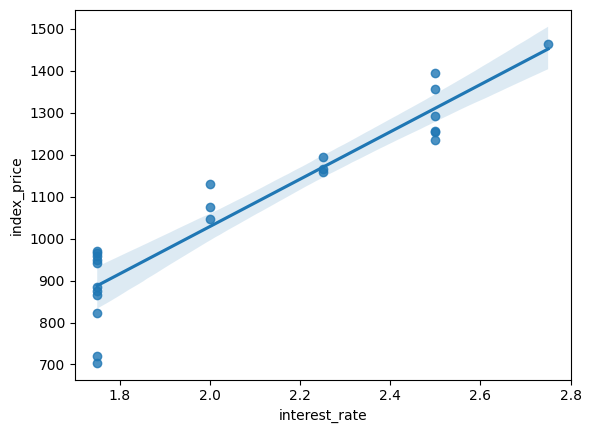

In [48]:
sns.regplot(x=df['interest_rate'], y=df['index_price'])

<Axes: xlabel='index_price', ylabel='unemployment_rate'>

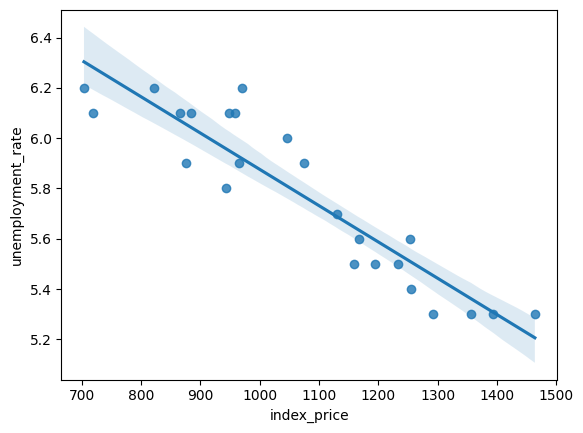

In [53]:
sns.regplot(x=df['index_price'], y = df['unemployment_rate'])

In [55]:
scalar = StandardScaler()

In [57]:
x_train_scalar = scalar.fit_transform(x_train)
x_test_scalar = scalar.transform(x_test)

In [ ]:
model = LinearRegression()
model.fit(x_train_scalar, y_train)

In [62]:
y_pred = model.predict(x_test_scalar)

In [77]:
validation_score = cross_val_score(model, x_train, y_train, scoring="neg_mean_squared_error", cv=3)

In [79]:
np.mean(validation_score)

np.float64(-5914.828180162386)

In [84]:
### Prediction: 

y_pred = model.predict(x_test)

H:\Python-all-in-one\ML-algorithams\myenv\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [87]:
from sklearn.metrics import r2_score

In [89]:
r2_score(y_test, y_pred)

-8.39599834846004

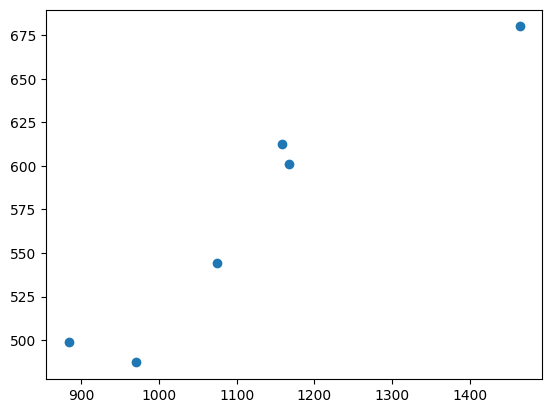

In [90]:
plt.scatter(y_test, y_pred)

In [92]:
residuals = y_test - y_pred

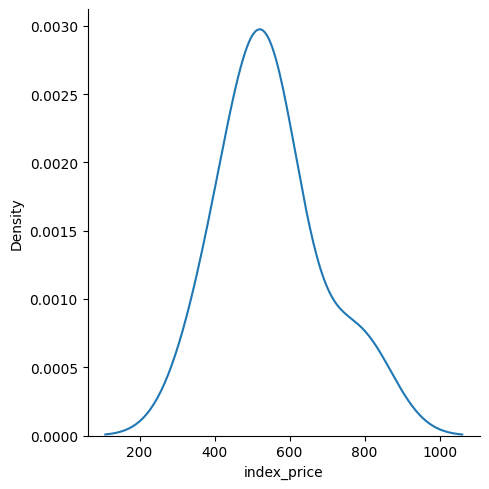

In [95]:
sns.displot(residuals, kind='kde')

In [96]:
# scatter plot with residuals and predictions

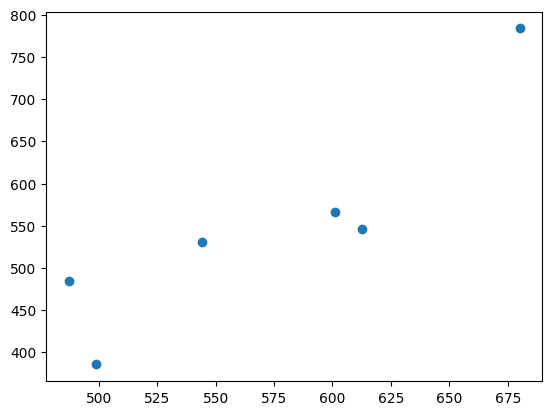

In [97]:
plt.scatter(y_pred, residuals)